### Importing & Loading what we need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Our DataSet
data = pd.read_csv('Zomato Data Analysis_P_Using Python/Zomato-data-.csv')

In [2]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


* Insight: There's No Null Values in our data

#### Handling the "rate" column by removing "/" and convert it to float.

In [4]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

data['rate']=data['rate'].apply(handleRate)

In [5]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


### EDA

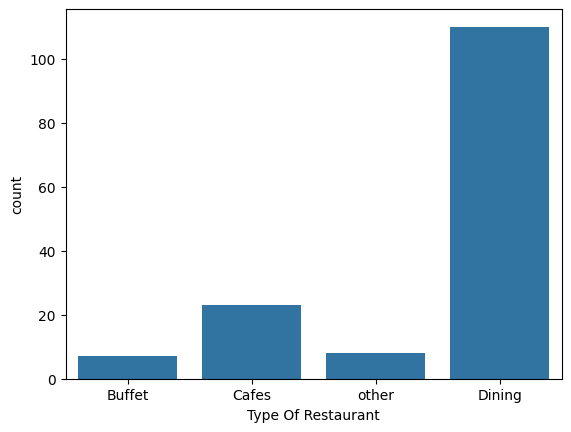

In [46]:
sns.countplot(data = data, x = 'listed_in(type)')
plt.xlabel('Type Of Restaurant')
plt.show()

* Insight: It seems that most of the restaurants fall into the Dining category

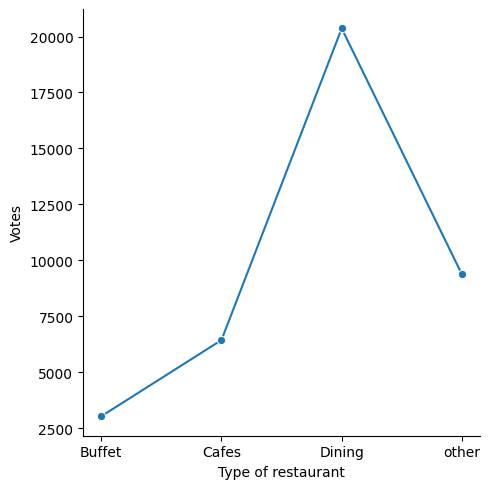

In [45]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
sns.relplot(data = result, x = 'listed_in(type)', y = 'votes', kind = 'line', marker = 'o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')
plt.show()

* Insight: Dining restaurants are preferred by most of individuals.

In [28]:
max_votes = data['votes'].max()
restaurant_with_max_votes = data.loc[data['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


* Insight: Empire Restaurant got most of votes by 38 vote

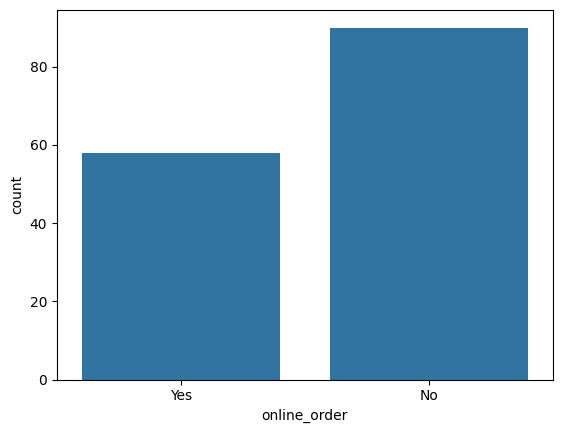

In [44]:
sns.countplot(data = data, x = 'online_order')
plt.show()

* Insight: Based on this visual it suggests that most of the restaurants don't accept online order

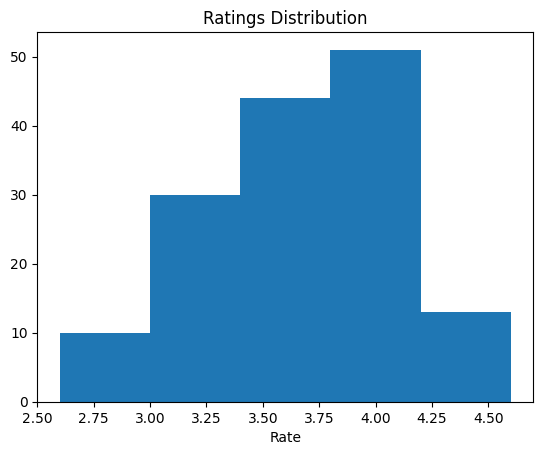

In [43]:
plt.hist(data = data, x = 'rate',bins=5)
plt.xlabel('Rate')
plt.title('Ratings Distribution')
plt.show()

* Insight: Most of the restaurants received ratings ranging from 3.5 to 4

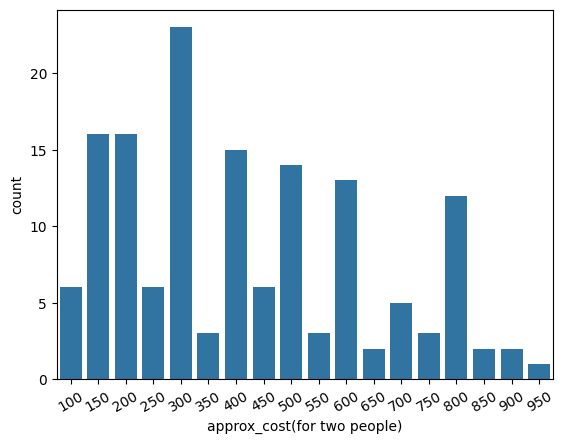

In [42]:
sns.countplot(data = data, x = 'approx_cost(for two people)')
plt.xticks(rotation=30)
plt.show()

* Insight: Most of the couples prefer restaurants with an approximate cost of 300

<Figure size 600x600 with 0 Axes>

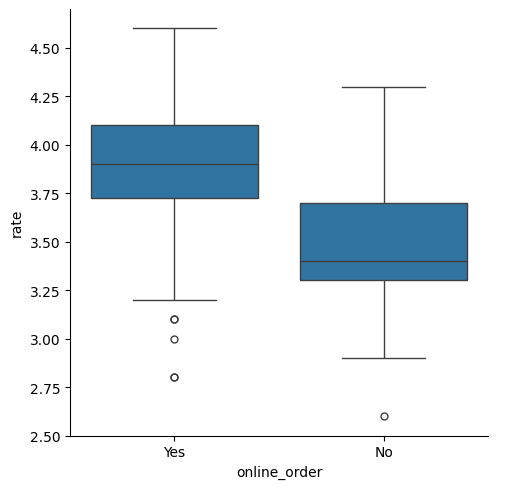

In [57]:
plt.figure(figsize = (6,6))
sns.catplot(x = 'online_order', y = 'rate', data = data, kind = 'box')
plt.show()

* Insight: Offline orders received lower ratings comparing to online orders, which obtained excellent ratings

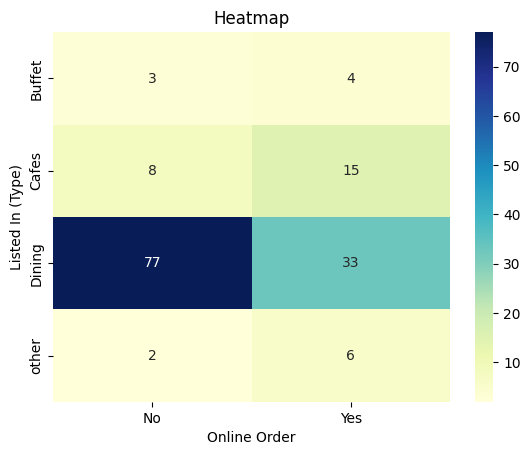

In [63]:
pivot_table = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

* Insight: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.